#                              Machine Failure Prediction

## Intoduction

Machine failure prediction refers to the task of using machine learning and data analysis techniques to predict when a machine or equipment is likely to fail or experience a breakdown. By analyzing historical data and identifying patterns and indicators, machine failure prediction models can provide early warnings or alerts, enabling proactive maintenance and minimizing downtime.

Relevant data is collected from the machines or equipment, such as sensor readings, operational parameters, maintenance records, and historical failure data. This data serves as the basis for training and building the predictive models.

In this project, our task is to predict machine failure based on 13 features: <br>
<br>
    •	__Product ID__ is an identification code for each product. This ID is a combination of letters and numbers.<br>
    •	__Type__ is the classification of the product or device into three categories: Low, Medium, and High. The proportions of these types in the dataset are as follows: Low 70%, Medium 23.5%, and High 6.5%.<br>
    •	__Air temperature [K]__ represents the temperature of the air, measured in Kelvin units.<br>
    •	__Process temperature [K]__ indicates the temperature during the production process, measured in Kelvin units.<br>
    •	__Rotational speed [rpm]__ refers to the number of revolutions per minute. It is calculated based on a power of 2860 W and is subject to normally distributed noise.<br>
    •	__Torque [Nm]__ measures the force that causes an object to rotate, expressed in Newton-meters (Nm). The torque values are normally distributed around 40 Nm and do not include negative values.<br>
    •	__Tool wear [min]__ represents the time it takes for production tools to erode or become damaged due to regular wear and tear caused by cutting operations.<br>
Features indicating the area or cause of failure are as follows:<br>
    •	__TWF (Tool Wear Failure):__ Indicates industrial tool failure, leading to the need for equipment change and defective products.<br>
    •	__HDF (Heat Dissipation Failure):__ Indicates failure in heat dissipation during the production process.<br>
    •	__PWF (Power Failure):__ Indicates that the supplied power was not suitable for the production process, resulting in a failure.<br>
    •	__OSF (Overstain Failure):__ Indicates failure due to product overstains, which may occur as a result of high load and tension during production.<br>
    •	__RNF (Random Failure):__ Indicates that a random error causes the failure.<br>


### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load Dataset from CSV file:


In [2]:
df = pd.read_csv('train_MachineFailure.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Exploratory Data Analysis(EDA)
Let's check the shape, column types, null values and summary statistics of the dataset.

In [3]:
df.shape

(136429, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

No null values in the dataset

In [6]:
df.describe(include = 'all')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429,136429,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
unique,NaN,9976,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,L53257,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,139,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68214.000000,NaN,NaN,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,NaN,NaN,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,NaN,NaN,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,NaN,NaN,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,NaN,NaN,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,NaN,NaN,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Some important insights from the summary statistics:

- __Type:__ There are three types of products: The most frequent type is 'L', occurring 95,354 times.


- __Temperature:__
The air temperature varies between approximately 295.3 K (Kelvin) and 304.4 K.<br>
The process temperature ranges from about 305.8 K to 313.8 K.<br>
Both air and process temperatures seem to have relatively low standard deviations, indicating that they are not highly variable.<br>
- __Rotational Speed:__ The rotational speed varies from 1,181 rpm to 2,886 rpm.

- __Torque:__ Torque values range from 3.8 Nm (Newton-meters) to 76.6 Nm.

- __Tool Wear:__ Tool wear values range from 0 minutes to 253 minutes, with an average of approximately 104.41 minutes.

### Lets explore the Type column:
- Type is the classification of the Machine into three categories: Low, Medium, and High.

In [7]:
#count of machines for each type of machine failed and not failed.
df.groupby('Machine failure')['Type'].value_counts()

Machine failure  Type
0                L       93759
                 M       31715
                 H        8807
1                L        1595
                 M         437
                 H         116
Name: Type, dtype: int64

In [8]:
#share of each machine type in full dataset
df['Type'].value_counts(normalize=True)

L    0.698928
M    0.235668
H    0.065404
Name: Type, dtype: float64

The proportions of these types in the dataset are as follows: Low 70%, Medium 23.5%, and High 6.5%.

#### Let us visualise the failure% of each machine type.

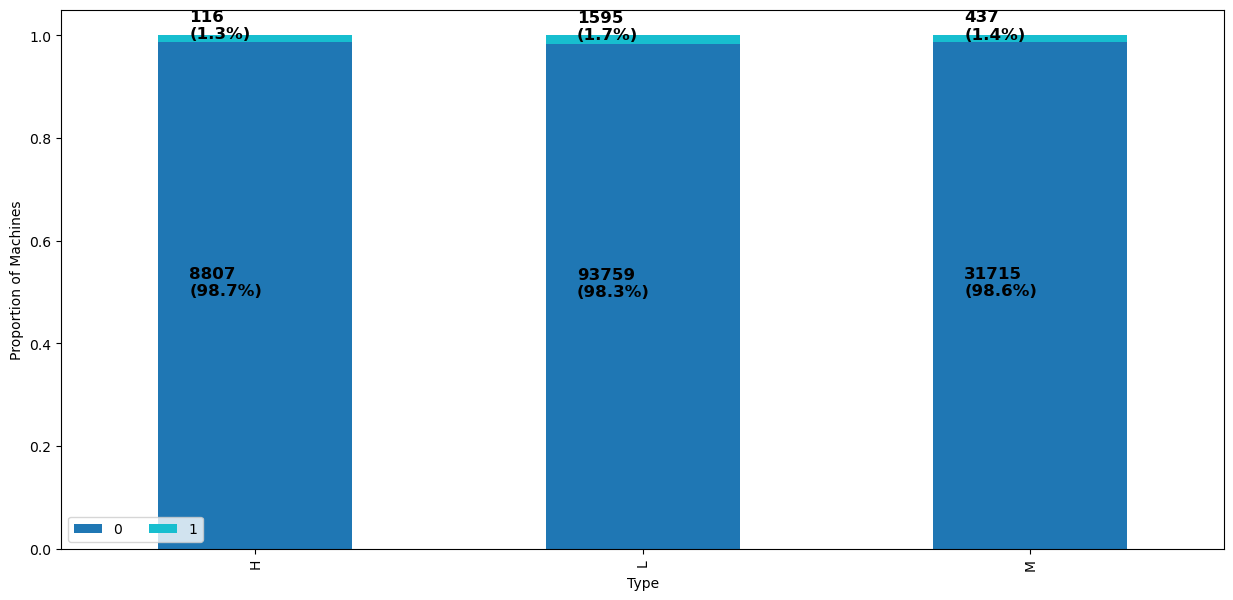

In [9]:
cross_tab = pd.crosstab(index=df['Type'],
                        columns=df['Machine failure'])
cross_tab_prop = pd.crosstab(index=df['Type'],
                        columns=df['Machine failure'],
                       normalize="index")
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 7))
plt.legend(loc="lower left", ncol=2)
plt.xlabel("Type")
plt.ylabel("Proportion of Machines")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

Between 1.3 to 1.7% of all machine types have failed

<Axes: xlabel='Type'>

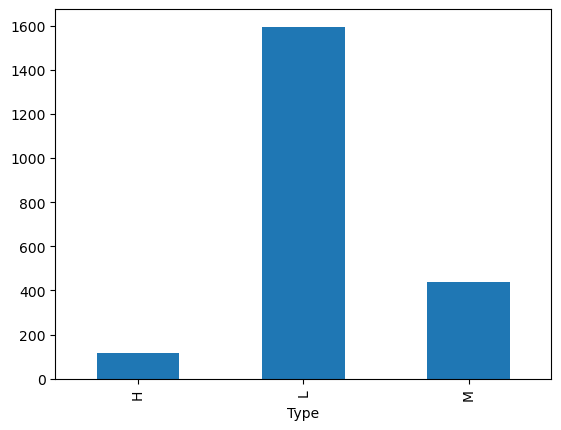

In [10]:
df_fail = df[df['Machine failure']==1]
df_fail.groupby('Type')['Machine failure'].sum().plot.bar()

### Machine failure % in the full dataset or Baseline Accuracy:

In [11]:
df['Machine failure'].value_counts(normalize=True)

0    0.984256
1    0.015744
Name: Machine failure, dtype: float64

- __0 (No Machine Failure):__ Approximately 98.43% of the data points fall into this category.
- __1 (Machine Failure):__ Approximately 1.57% of the data points fall into this category.
This distribution indicates that machine failures are relatively rare in the dataset, occurring in only a small percentage of cases.

In [12]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

### Exploring the catogorical features.

Below are the Types of failures:

•	__TWF (Tool Wear Failure):__ Indicates industrial tool failure, leading to the need for equipment change and defective products.<br>
•	__HDF (Heat Dissipation Failure):__ Indicates failure in heat dissipation during the production process.<br>
•	__PWF (Power Failure):__ Indicates that the supplied power was not suitable for the production process, resulting in a failure.<br>
•	__OSF (Overstain Failure):__ Indicates failure due to product overstains, which may occur as a result of high load and tension during production.<br>
•	__RNF (Random Failure):__ Indicates that a random error causes the failure.<br>


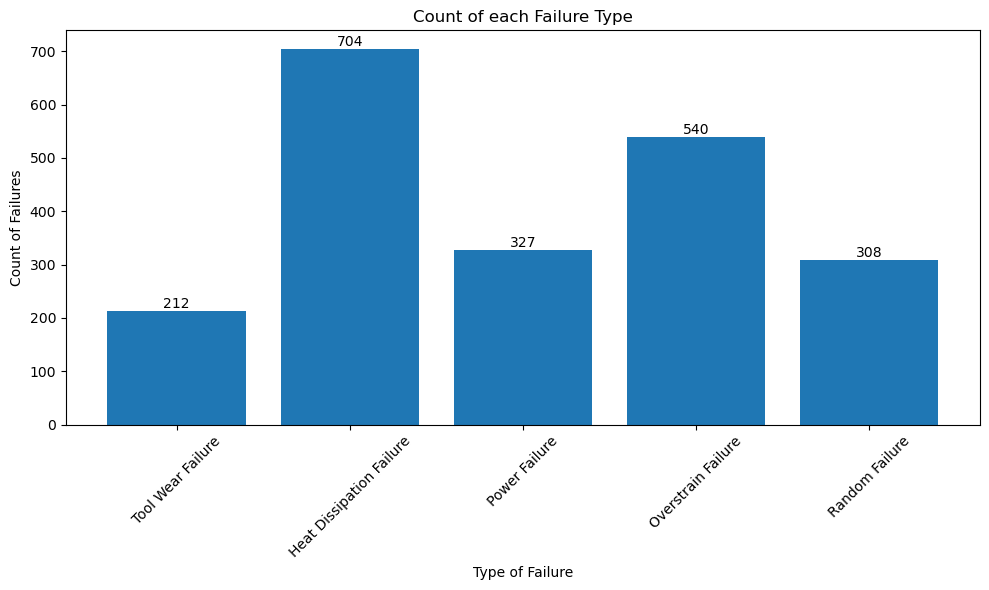

In [13]:
counts = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
column_labels = {
    'TWF': 'Tool Wear Failure',
    'HDF': 'Heat Dissipation Failure',
    'PWF': 'Power Failure',
    'OSF': 'Overstrain Failure',
    'RNF': 'Random Failure'
}

# Replace column names with descriptive labels
counts.index = counts.index.map(column_labels)

# Create a bar chart with labels
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)


# Add labels to each bar
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.xlabel('Type of Failure')
plt.ylabel('Count of Failures')
plt.title('Count of each Failure Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit in the plot
plt.show()

Most of the failures are of Heat Dissipation and Overstrain Failures, which might be related to Temperatures and Torque mechanically.

### Correlation Matrix

In [14]:
df.corr(numeric_only=True)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,1.000000,-0.005338,-0.002396,0.004419,-0.001968,-0.001790,0.001500,-0.000475,-0.000680,0.003275,0.002114,0.000175
Air temperature [K],-0.005338,1.000000,0.856080,0.016545,-0.006773,0.016994,0.067744,0.003826,0.100454,0.007967,0.007842,0.004815
Process temperature [K],-0.002396,0.856080,1.000000,0.011263,-0.006298,0.012777,0.030966,0.004459,0.041454,0.003871,0.005337,0.004399
Rotational speed [rpm],0.004419,0.016545,0.011263,1.000000,-0.779394,0.003983,-0.060868,-0.005765,-0.081996,0.053948,-0.061376,-0.003410
Torque [Nm],-0.001968,-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.145793,0.012983,0.100773,0.050289,0.108765,0.007986
Tool wear [min],-0.001790,0.016994,0.012777,0.003983,-0.003148,1.000000,0.056448,0.046470,0.011709,0.007624,0.063604,-0.002071
Machine failure,0.001500,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,-0.000475,0.003826,0.004459,-0.005765,0.012983,0.046470,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,-0.000680,0.100454,0.041454,-0.081996,0.100773,0.011709,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885
PWF,0.003275,0.007967,0.003871,0.053948,0.050289,0.007624,0.383941,0.039927,0.046680,1.000000,0.090016,0.000827


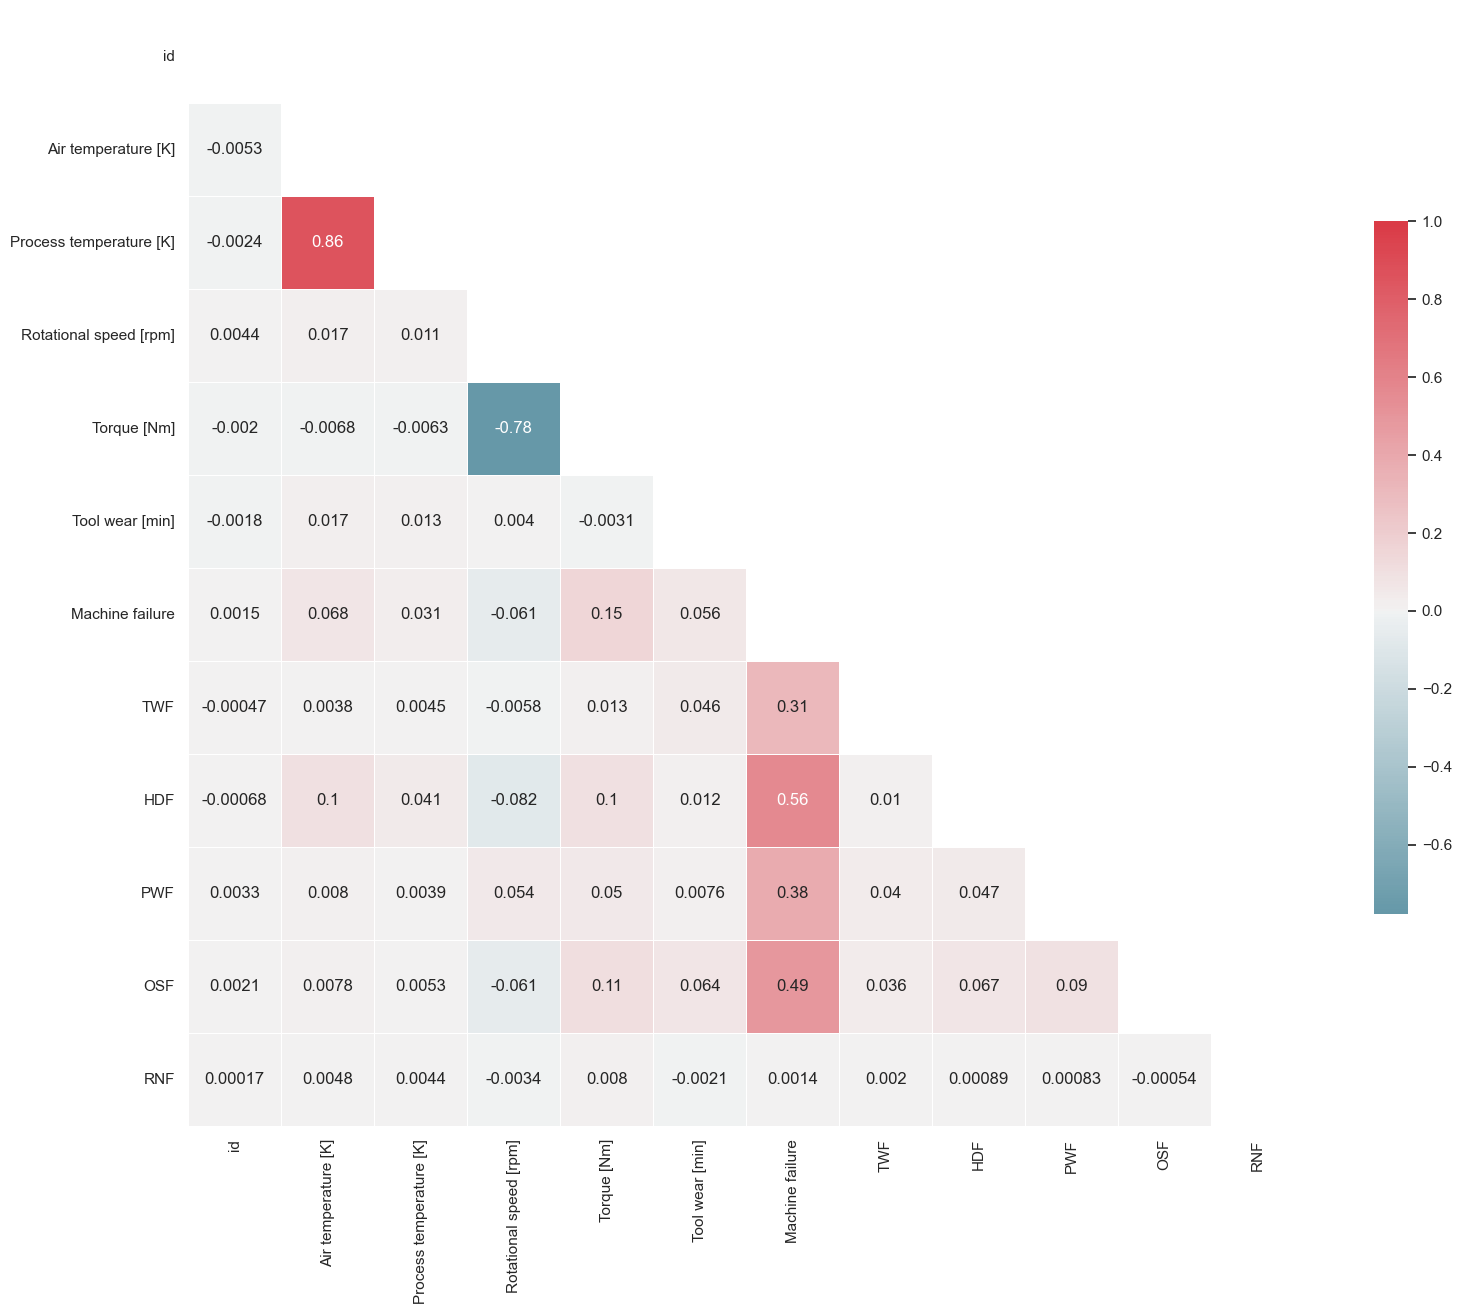

In [15]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

- __Temperature Relationships:__
	'Air temperature [K]' and 'Process temperature [K]' have a strong positive correlation of approximately 0.856. This indicates that when the air temperature is higher, the process temperature also tends to be higher, and vice versa. It suggests a significant linear relationship between these two temperature variables.
- __Rotational Speed and Torque:__
	'Rotational speed [rpm]' and 'Torque [Nm]' exhibit a strong negative correlation of approximately -0.779. This means that as rotational speed increases, torque decreases, and vice versa. This relationship is expected in mechanical systems, as higher rotational speed typically requires less torque to maintain.


### Pair Plots

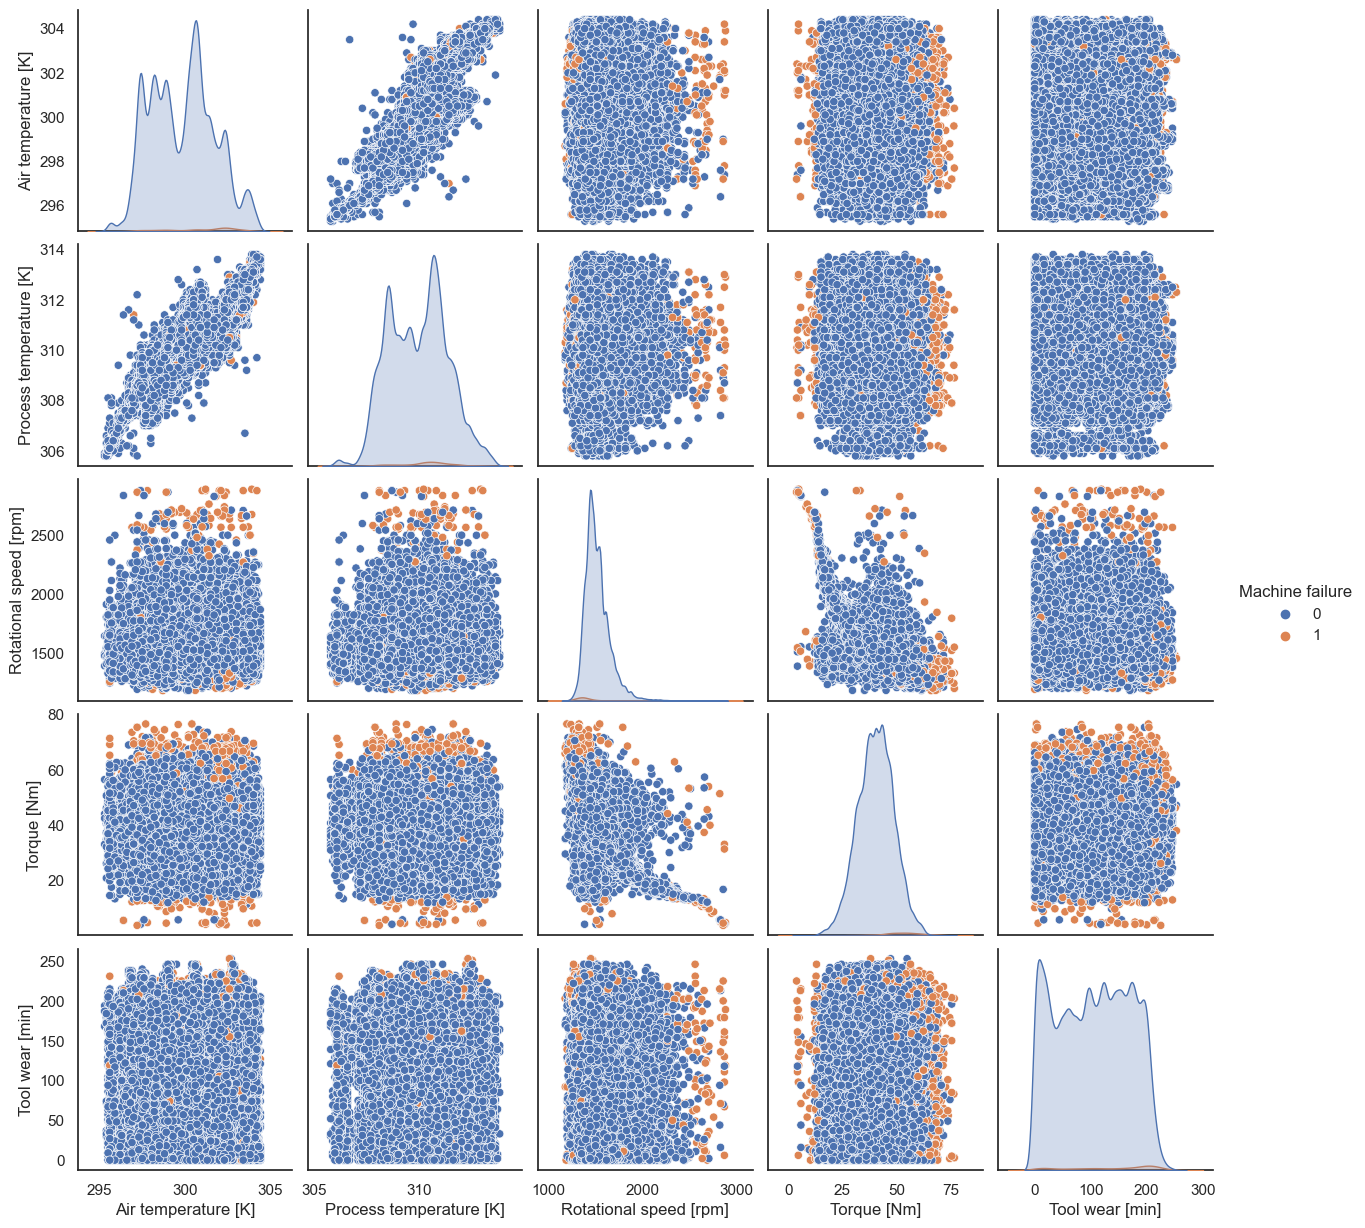

In [16]:
sns.pairplot(df, hue='Machine failure', vars=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
plt.show()

The failures tend to happen at the extreme values of torque from the front view.

### Possibility of failure with respect to the continous variables:

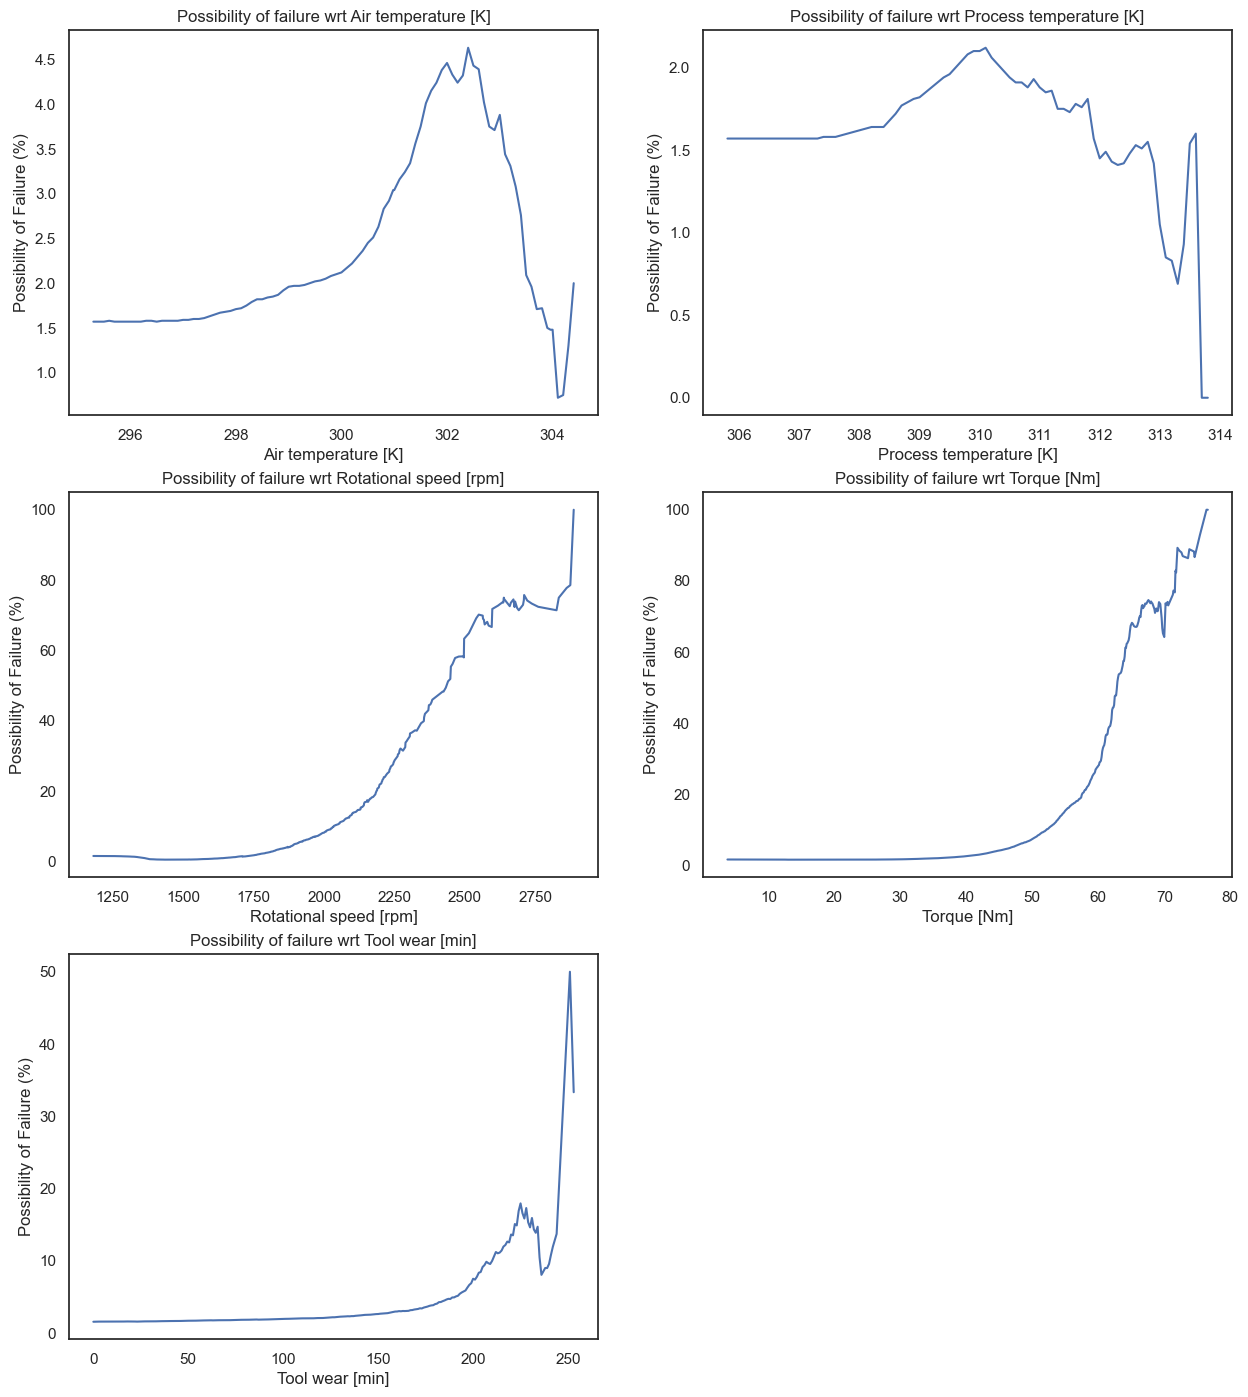

In [17]:
def feat_prob(feature,data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature]>=j]
        y.append(round((temp['Machine failure'].mean()*100),2))
        x.append(j)
    return(x,y)

plt.figure(figsize=(15,17))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt "+i))
    x,y = feat_prob(i,df)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

- Increase in temperatures seem to have low impact on possibility of failure.
- The possibility of failure increases with the increase in Rotational Speed[rpm], Torque[Nm] and Tool wear[min] 

## Prediction using Machine Learning Models


- Product ID is just an identification number of the machine which has no effect on the target varaible 'Machine failure'.
- Type is the machine type catogorical variable: We have seen earlier that the similar % of failure occurs in all the machine types as it is in the whole dataset.
- Rest of the categorical variables TWF, HDF, PWF, OSF, RNF are types of target variable 'Machine failure'. These can be used for clustering prdiction.

So, removing all the above features and predicting based on the rest of the continous features.


### Let us start with a simple Logistic Regression Model.

In [18]:
target_col = 'Machine failure'
feature_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X =  df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Model score on Training data:", logreg.score(X_train, y_train))
print("Model score on Test data:", logreg.score(X_test, y_test))
y_pred = logreg.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Model score on Training data: 0.9846256745737244
Model score on Test data: 0.9845341933592319
Confusion Matrix:
[[26846     4]
 [  418    18]]


That seems to be a very good score of 98%. But, if we recall the baseline accuracy of this dataset, it is also 98%.

These type of datasets are called imbalanced datasets. Imbalanced datasets can give biased models and misleading evaluation metrics.

So, we will balance the dataset first and then apply the ML models.


### Balancing the dataset

In [19]:
# Seperating the rows with 'Machine failure' = 1 to a different dataset as df_fail.
df_fail = df[df['Machine failure']==1]
df_fail.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0


In [20]:
df_fail.shape

(2148, 14)

In [21]:
fail_count = df_fail.shape[0]

In [22]:
#Seperating the rows with 'Machine failure' = 0 to a different dataset as df_nofail.

df_nofail = df[df['Machine failure']==0]
df_nofail.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [23]:
df_nofail.shape

(134281, 14)

In [24]:
# Randomly selecting the same number of rows as in df_fail from df_nofail and concatenating with df_fail.
df_nofail_sample = df_nofail.sample(n=fail_count, axis=0)
df_balance = pd.concat([df_fail,df_nofail_sample], axis=0)

In [25]:
df_balance.shape

(4296, 14)

In [26]:
df_balance['Machine failure'].value_counts()

1    2148
0    2148
Name: Machine failure, dtype: int64

So, now we have a very balanced dataset of 50% Trues and 50% Falses in the target variable. Thus the baseline accuracy is 50%.

In [27]:
# coding this balancing of dataset into a function to reuse.
def balanced_dataset(df):
    df_fail = df[df['Machine failure']==1]
    fail_count = df_fail.shape[0]
    df_nofail = df[df['Machine failure']==0]
    df_nofail_sample = df_nofail.sample(n=fail_count)
    df_balance = pd.concat([df_fail,df_nofail_sample], axis=0)
    return df_balance

### Function to run a model and provide metrics

In [28]:
# Initialisng a dictionary object for metrics of each model.
data = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

#Function to run a ML model and get the metrics by passing the dataframe, model object and metrics dictionary data.
def model_performance(df, model_object, data):
    
    target_col = 'Machine failure'
    feature_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

    X =  df[feature_cols]
    y = df[target_col]
    #Splitting the dataset into training and testing data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    #fitting the model
    model_object.fit(X_train, y_train)
    #printing the scores
    print("Train data score:",model_object.score(X_train, y_train))
    print("Test data score:",model_object.score(X_test, y_test))
    #confusion matrix
    y_pred = model_object.predict(X_test)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    #performance metrics to compare different models   
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #populating the data dictionary
    data['Accuracy'].append(accuracy)
    data['Precision'].append(precision)
    data['Recall'].append(recall)
    data['F1-Score'].append(f1)

    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = model_object.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    return data
    

### Logistic Regression with balanced dataset

Train data score: 0.770081490104773
Test data score: 0.7534883720930232
Confusion Matrix:
[[328 102]
 [110 320]]


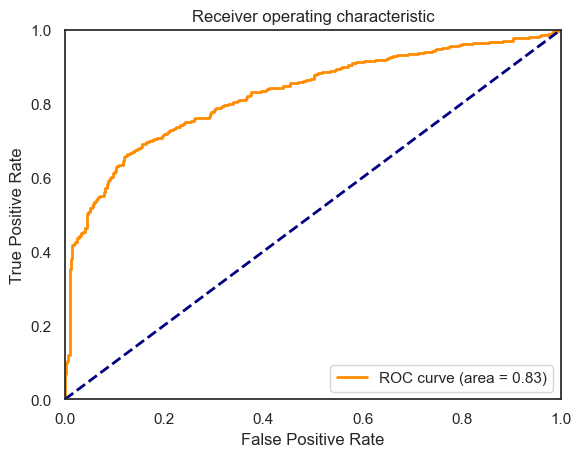

{'Model': ['Logistic Regression'],
 'Accuracy': [0.7534883720930232],
 'Precision': [0.7582938388625592],
 'Recall': [0.7441860465116279],
 'F1-Score': [0.7511737089201879]}

In [29]:
Logreg = LogisticRegression(max_iter=1000)
model_performance(df_balance, Logreg, data)
data['Model'].append('Logistic Regression')
data

The Logistic Regression model has moderate accuracy and balanced precision and recall. It performs reasonably well at correctly classifying instances and maintains a balance between false positives and false negatives.

### Support Vector Machine with balanced dataset

Train data score: 0.7735739231664727
Test data score: 0.7616279069767442
Confusion Matrix:
[[349  81]
 [124 306]]


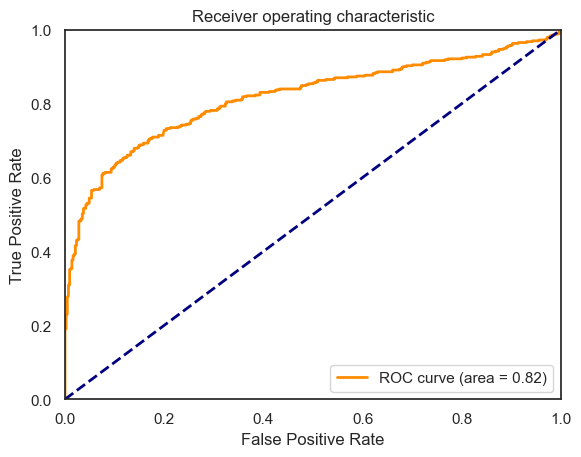

{'Model': 'Support Vector Machine',
 'Accuracy': 0.7616279069767442,
 'Precision': 0.7906976744186046,
 'Recall': 0.7116279069767442,
 'F1-Score': 0.7490820073439413}

In [30]:
svm = SVC(kernel='linear', probability=True)
model_performance(df_balance, svm, data)
data['Model'].append('Support Vector Machine')
svm_index = data['Model'].index('Support Vector Machine')
svm_data = {
    'Model': data['Model'][svm_index],
    'Accuracy': data['Accuracy'][svm_index],
    'Precision': data['Precision'][svm_index],
    'Recall': data['Recall'][svm_index],
    'F1-Score': data['F1-Score'][svm_index]
}
svm_data

The SVM model shows good precision, but its recall is relatively lower, indicating that it may perform well in correctly classifying positive instances but may miss some of them. It has a slightly higher accuracy than Logistic Regression.

### Naive Bayes

Train data score: 0.8029685681024447
Test data score: 0.8325581395348837
Confusion Matrix:
[[363  67]
 [ 77 353]]


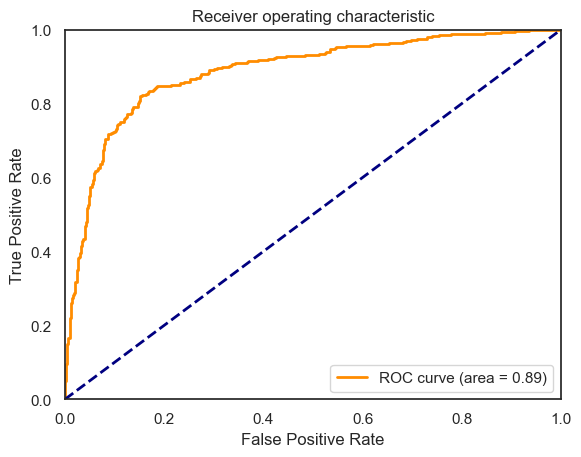

{'Model': 'Naive Bayes',
 'Accuracy': 0.8325581395348837,
 'Precision': 0.8404761904761905,
 'Recall': 0.8209302325581396,
 'F1-Score': 0.8305882352941176}

In [31]:
model_NB = GaussianNB()
model_performance(df_balance, model_NB, data)
data['Model'].append('Naive Bayes')
NB_index = data['Model'].index('Naive Bayes')
NB_data = {
    'Model': data['Model'][NB_index],
    'Accuracy': data['Accuracy'][NB_index],
    'Precision': data['Precision'][NB_index],
    'Recall': data['Recall'][NB_index],
    'F1-Score': data['F1-Score'][NB_index]
}
NB_data

The Naive Bayes model exhibits a higher, along with good precision and recall values. This suggests that it performs well in both classifying instances correctly and avoiding false positives.

### Random Forest

Train data score: 0.9997089639115251
Test data score: 0.8523255813953489
Confusion Matrix:
[[372  58]
 [ 69 361]]


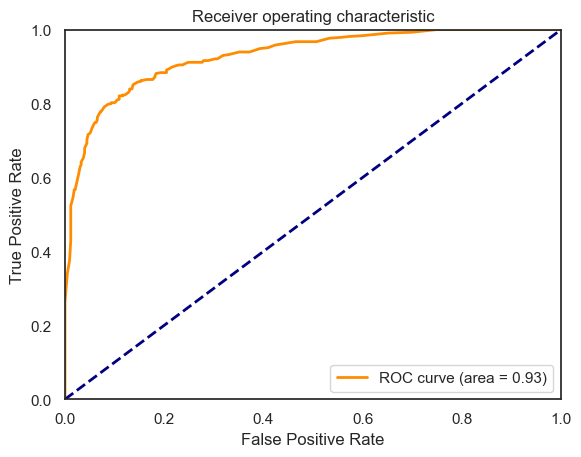

{'Model': 'Random Forest',
 'Accuracy': 0.8523255813953489,
 'Precision': 0.8615751789976134,
 'Recall': 0.8395348837209302,
 'F1-Score': 0.850412249705536}

In [32]:
rf = RandomForestClassifier()
model_performance(df_balance, rf, data)
data['Model'].append('Random Forest')
RF_index = data['Model'].index('Random Forest')
RF_data = {
    'Model': data['Model'][RF_index],
    'Accuracy': data['Accuracy'][RF_index],
    'Precision': data['Precision'][RF_index],
    'Recall': data['Recall'][RF_index],
    'F1-Score': data['F1-Score'][RF_index]
}
RF_data

The Random Forest model shows high accuracy and good precision and recall values. It performs well in classifying instances, maintaining a balance between precision and recall. This makes it a strong candidate for this classification task.

### KNN Classifier

Train data score: 0.8527357392316647
Test data score: 0.8372093023255814
Confusion Matrix:
[[355  75]
 [ 65 365]]


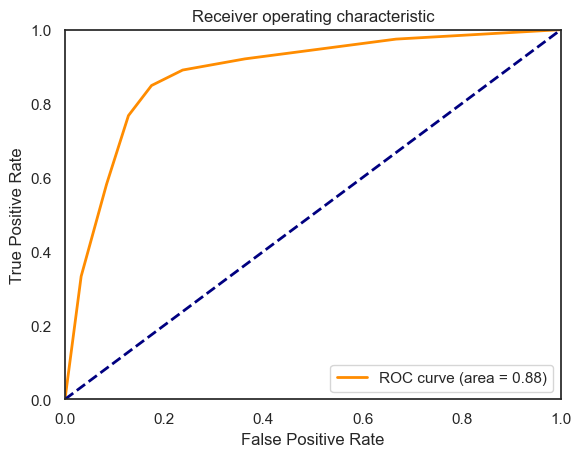

{'Model': 'KNN Classifier',
 'Accuracy': 0.8372093023255814,
 'Precision': 0.8295454545454546,
 'Recall': 0.8488372093023255,
 'F1-Score': 0.839080459770115}

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)
model_performance(df_balance, knn, data)
data['Model'].append('KNN Classifier')
KNN_index = data['Model'].index('KNN Classifier')
KNN_data = {
    'Model': data['Model'][KNN_index],
    'Accuracy': data['Accuracy'][KNN_index],
    'Precision': data['Precision'][KNN_index],
    'Recall': data['Recall'][KNN_index],
    'F1-Score': data['F1-Score'][KNN_index]
}
KNN_data

The KNN Classifier model has a decent accuracy rate and a balanced precision and recall. It performs well in identifying positive instances but may have a slight imbalance between false positives and false negatives compared to the Random Forest model.

## Hyperparameter Tuning

Using GridSearchCV or RandomisedSearchCV for each model. 

In [34]:
target_col = 'Machine failure'
feature_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X =  df_balance[feature_cols]
y = df_balance[target_col]

### Logistic Regression with Best Parameters

Train data score: 0.7747380675203726
Test data score: 0.7558139534883721
Confusion Matrix:
[[329 101]
 [109 321]]


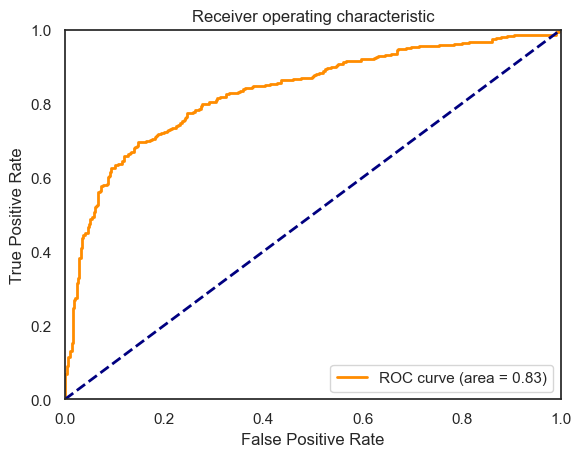

{'Model': 'Logistic Regression with Best Parameters',
 'Accuracy': 0.7558139534883721,
 'Precision': 0.7606635071090048,
 'Recall': 0.7465116279069768,
 'F1-Score': 0.7535211267605634}

In [35]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
LR = GridSearchCV(LogisticRegression(solver='liblinear',max_iter=1000),lr_params,cv=5,return_train_score=False)
LR.fit(X,y)
model_performance(df_balance, LR.best_estimator_, data)
data['Model'].append('Logistic Regression with Best Parameters')
LR_index = data['Model'].index('Logistic Regression with Best Parameters')
LR_data = {
    'Model': data['Model'][LR_index],
    'Accuracy': data['Accuracy'][LR_index],
    'Precision': data['Precision'][LR_index],
    'Recall': data['Recall'][LR_index],
    'F1-Score': data['F1-Score'][LR_index]
}
LR_data

After tuning the parameters, the Logistic Regression model has shown a slight improvement in accuracy, precision, recall, and F1-Score. However, the overall performance remains similar to the initial results.

### Support Vector Machine with Best Parameters

Train data score: 0.8655413271245634
Test data score: 0.8418604651162791
Confusion Matrix:
[[365  65]
 [ 71 359]]


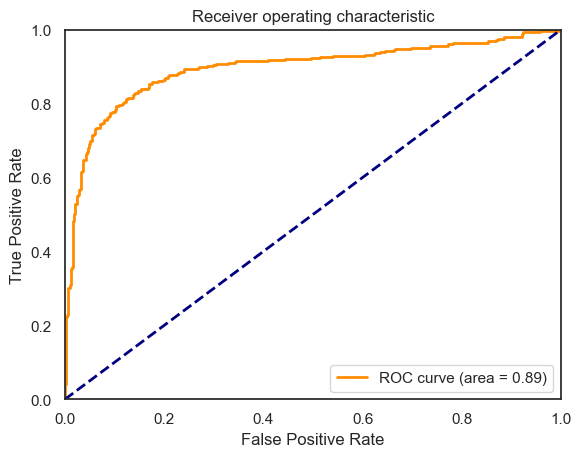

{'Model': 'Support Vector Machine with Best Parameters',
 'Accuracy': 0.8418604651162791,
 'Precision': 0.8466981132075472,
 'Recall': 0.8348837209302326,
 'F1-Score': 0.8407494145199063}

In [36]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
SVM = RandomizedSearchCV(SVC(probability=True),param_distributions = svc_params,n_iter=5, cv=5,return_train_score=False)
SVM.fit(X,y)
model_performance(df_balance, SVM.best_estimator_, data)
data['Model'].append('Support Vector Machine with Best Parameters')
svm_index = data['Model'].index('Support Vector Machine with Best Parameters')
svm_data = {
    'Model': data['Model'][svm_index],
    'Accuracy': data['Accuracy'][svm_index],
    'Precision': data['Precision'][svm_index],
    'Recall': data['Recall'][svm_index],
    'F1-Score': data['F1-Score'][svm_index]
}
svm_data

With optimized parameters, the SVM model has seen significant improvements across all metrics. It now achieves a higher accuracy, precision, recall, and F1-Score compared to the initial results. This suggests that parameter tuning has substantially improved the model's performance.

### Random Forest with Best Parameters

Train data score: 0.9508149010477299
Test data score: 0.8523255813953489
Confusion Matrix:
[[369  61]
 [ 66 364]]


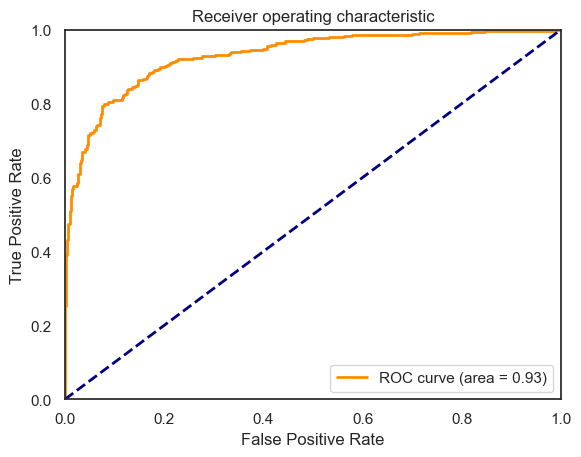

{'Model': 'Random Forest with Best Parameters',
 'Accuracy': 0.8523255813953489,
 'Precision': 0.8564705882352941,
 'Recall': 0.8465116279069768,
 'F1-Score': 0.8514619883040937}

In [37]:
rf_param = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
RF = RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions = rf_param, 
                                 n_iter=5, 
                                 cv=5)
RF.fit(X,y)
model_performance(df_balance, RF.best_estimator_, data)
data['Model'].append('Random Forest with Best Parameters')
RF_index = data['Model'].index('Random Forest with Best Parameters')
RF_data = {
    'Model': data['Model'][RF_index],
    'Accuracy': data['Accuracy'][RF_index],
    'Precision': data['Precision'][RF_index],
    'Recall': data['Recall'][RF_index],
    'F1-Score': data['F1-Score'][RF_index]
}
RF_data

The Random Forest model, with its best parameters, maintains its high accuracy and balanced precision-recall trade-off. The performance remains consistent with the initial results, indicating that the initial parameters might have been well-suited for this task.

### KNN Classifier with Best Parameters

Train data score: 0.8457508731082655
Test data score: 0.8290697674418605
Confusion Matrix:
[[356  74]
 [ 73 357]]


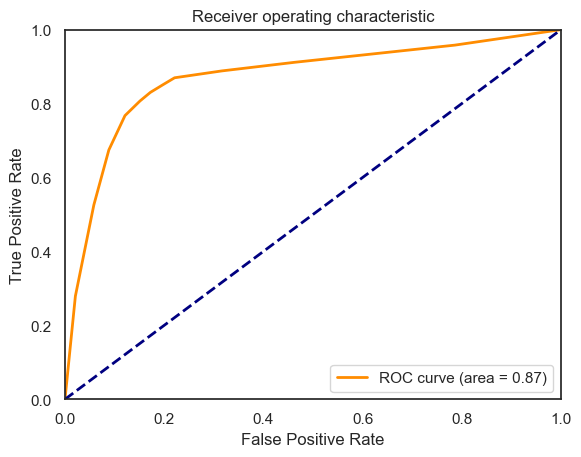

{'Model': 'KNN Classifier with Best Parameters',
 'Accuracy': 0.8290697674418605,
 'Precision': 0.8283062645011601,
 'Recall': 0.8302325581395349,
 'F1-Score': 0.8292682926829269}

In [38]:
param_grid = {
    'n_neighbors': [5, 7, 9, 11],   
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
KNN = GridSearchCV(KNeighborsClassifier(), 
                        param_grid = param_grid, 
                        cv=5)
KNN.fit(X,y)
model_performance(df_balance, KNN.best_estimator_, data)
data['Model'].append('KNN Classifier with Best Parameters')
KNN_index = data['Model'].index('KNN Classifier with Best Parameters')
KNN_data = {
    'Model': data['Model'][KNN_index],
    'Accuracy': data['Accuracy'][KNN_index],
    'Precision': data['Precision'][KNN_index],
    'Recall': data['Recall'][KNN_index],
    'F1-Score': data['F1-Score'][KNN_index]
}
KNN_data

The KNN Classifier with optimized parameters also shows a slight improvement in accuracy and a balanced precision-recall trade-off. The performance remains similar to the initial results, suggesting that the initial parameters were already reasonably effective.

### Let us scale the features and re-run the models

Scaling the Features using MinMaxScaler()

In [39]:
columns_to_scale = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_standard = balanced_dataset(df[columns_to_scale])
df_standard.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
130,0.945055,0.8750,0.096188,0.723901,0.083004,1.0
164,0.791209,0.5750,0.073900,0.700549,0.687747,1.0
228,0.593407,0.4875,0.408798,0.331044,0.079051,1.0
236,0.219780,0.3500,0.045161,0.796703,0.569170,1.0
247,0.846154,0.6875,0.093842,0.648352,0.687747,1.0


In [40]:
df_standard.shape

(4296, 6)

### Logistic Regression with Scaled Features

Train data score: 0.7727008149010477
Test data score: 0.7744186046511627
Confusion Matrix:
[[331  99]
 [ 95 335]]


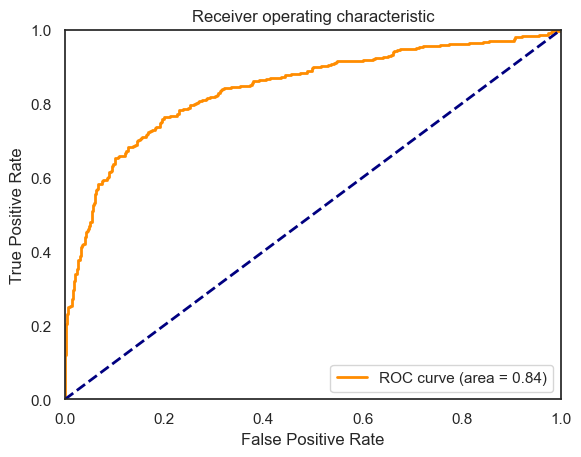

{'Model': 'Logistic Regression with Scaled Features',
 'Accuracy': 0.7744186046511627,
 'Precision': 0.771889400921659,
 'Recall': 0.7790697674418605,
 'F1-Score': 0.7754629629629629}

In [41]:
model_performance(df_standard, LR.best_estimator_, data)
data['Model'].append('Logistic Regression with Scaled Features')
LR_index = data['Model'].index('Logistic Regression with Scaled Features')
LR_data = {
    'Model': data['Model'][LR_index],
    'Accuracy': data['Accuracy'][LR_index],
    'Precision': data['Precision'][LR_index],
    'Recall': data['Recall'][LR_index],
    'F1-Score': data['F1-Score'][LR_index]
}
LR_data

Scaling the features has resulted in a modest improvement in accuracy, precision, recall, and F1-Score for the Logistic Regression model. The balanced precision and recall indicate that the model performs consistently across both positive and negative classes.

### Support Vector Machine with Scaled Features

Train data score: 0.7514551804423748
Test data score: 0.7430232558139535
Confusion Matrix:
[[321 109]
 [112 318]]


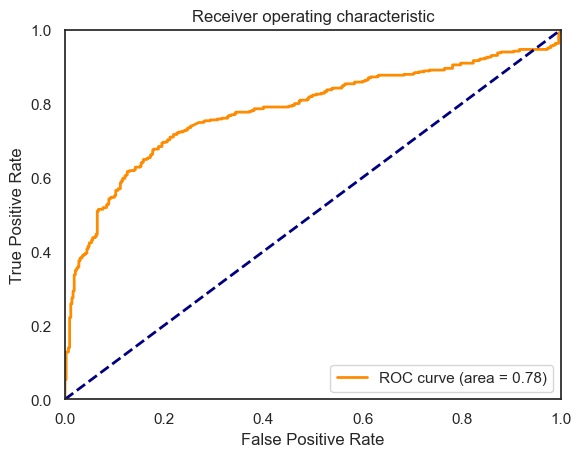

{'Model': 'Support Vector Machine with Scaled Features',
 'Accuracy': 0.7430232558139535,
 'Precision': 0.7447306791569087,
 'Recall': 0.7395348837209302,
 'F1-Score': 0.7421236872812135}

In [42]:
model_performance(df_standard, SVM.best_estimator_, data)
data['Model'].append('Support Vector Machine with Scaled Features')
svm_index = data['Model'].index('Support Vector Machine with Scaled Features')
svm_data = {
    'Model': data['Model'][svm_index],
    'Accuracy': data['Accuracy'][svm_index],
    'Precision': data['Precision'][svm_index],
    'Recall': data['Recall'][svm_index],
    'F1-Score': data['F1-Score'][svm_index]
}
svm_data

After scaling the features, the Support Vector Machine model's performance has slightly decreased in terms of accuracy, precision, recall, and F1-Score compared to its performance with the best parameters. This suggests that feature scaling might not be as beneficial for this model in this context.

### Naive Bayes with Scaled Features

Train data score: 0.8084982537834692
Test data score: 0.786046511627907
Confusion Matrix:
[[350  80]
 [104 326]]


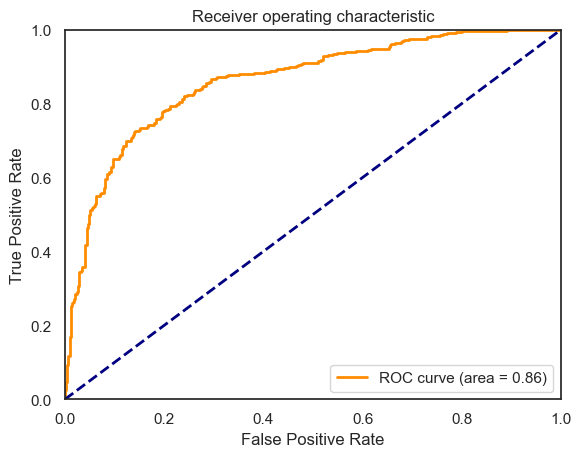

{'Model': 'Naive Bayes with Scaled Features',
 'Accuracy': 0.786046511627907,
 'Precision': 0.8029556650246306,
 'Recall': 0.7581395348837209,
 'F1-Score': 0.7799043062200955}

In [43]:
model_performance(df_standard, model_NB, data)
data['Model'].append('Naive Bayes with Scaled Features')
NB_index = data['Model'].index('Naive Bayes with Scaled Features')
NB_data = {
    'Model': data['Model'][NB_index],
    'Accuracy': data['Accuracy'][NB_index],
    'Precision': data['Precision'][NB_index],
    'Recall': data['Recall'][NB_index],
    'F1-Score': data['F1-Score'][NB_index]
}
NB_data

Feature scaling has led to improvements in accuracy and precision for the Naive Bayes model. However, there is a decrease in recall, which indicates that the model may have more false negatives. Nevertheless, it still achieves a good overall F1-Score.

### Random Forest with Scaled Features

Train data score: 0.9499417927823051
Test data score: 0.8674418604651163
Confusion Matrix:
[[377  53]
 [ 61 369]]


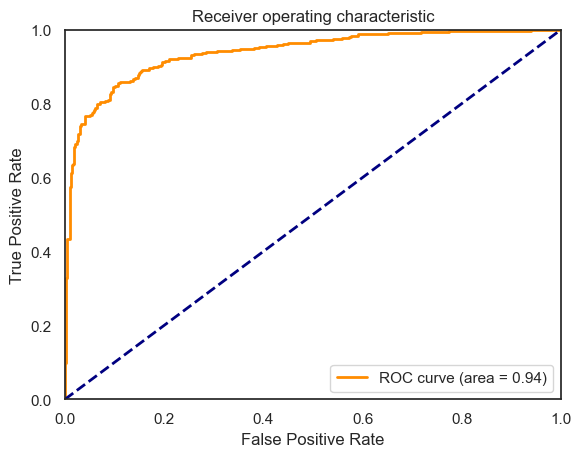

{'Model': 'Random Forest with Scaled Features',
 'Accuracy': 0.8674418604651163,
 'Precision': 0.8744075829383886,
 'Recall': 0.858139534883721,
 'F1-Score': 0.8661971830985915}

In [44]:
model_performance(df_standard, RF.best_estimator_, data)
data['Model'].append('Random Forest with Scaled Features')
RF_index = data['Model'].index('Random Forest with Scaled Features')
RF_data = {
    'Model': data['Model'][RF_index],
    'Accuracy': data['Accuracy'][RF_index],
    'Precision': data['Precision'][RF_index],
    'Recall': data['Recall'][RF_index],
    'F1-Score': data['F1-Score'][RF_index]
}
RF_data

Scaling the features has significantly improved the Random Forest model's performance, resulting in higher accuracy, precision, recall, and F1-Score. This model now performs exceptionally well, making it a strong choice for this classification task.

### KNN Classifier with Scaled Features

Train data score: 0.8608847497089639
Test data score: 0.8418604651162791
Confusion Matrix:
[[372  58]
 [ 78 352]]


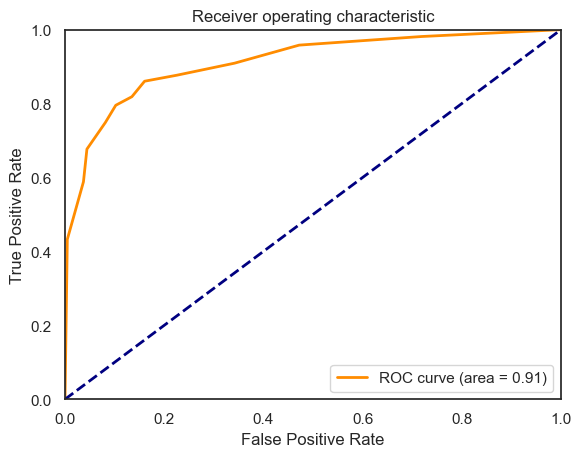

{'Model': 'KNN Classifier with Scaled Features',
 'Accuracy': 0.8418604651162791,
 'Precision': 0.8585365853658536,
 'Recall': 0.8186046511627907,
 'F1-Score': 0.838095238095238}

In [45]:
model_performance(df_standard, KNN.best_estimator_, data)
data['Model'].append('KNN Classifier with Scaled Features')
KNN_index = data['Model'].index('KNN Classifier with Scaled Features')
KNN_data = {
    'Model': data['Model'][KNN_index],
    'Accuracy': data['Accuracy'][KNN_index],
    'Precision': data['Precision'][KNN_index],
    'Recall': data['Recall'][KNN_index],
    'F1-Score': data['F1-Score'][KNN_index]
}
KNN_data

Feature scaling has resulted in an improvement in accuracy, precision, recall, and F1-Score for the KNN Classifier. The model maintains a balanced precision-recall trade-off and performs well overall.

### Comparision of Preformance Metrics between all models

In [46]:
# Create a DataFrame from the data
Performance_data = pd.DataFrame(data)
Performance_data

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.753488,0.758294,0.744186,0.751174
1,Support Vector Machine,0.761628,0.790698,0.711628,0.749082
2,Naive Bayes,0.832558,0.840476,0.820930,0.830588
3,Random Forest,0.852326,0.861575,0.839535,0.850412
4,KNN Classifier,0.837209,0.829545,0.848837,0.839080
5,Logistic Regression with Best Parameters,0.755814,0.760664,0.746512,0.753521
6,Support Vector Machine with Best Parameters,0.841860,0.846698,0.834884,0.840749
7,Random Forest with Best Parameters,0.852326,0.856471,0.846512,0.851462
8,KNN Classifier with Best Parameters,0.829070,0.828306,0.830233,0.829268
9,Logistic Regression with Scaled Features,0.774419,0.771889,0.779070,0.775463


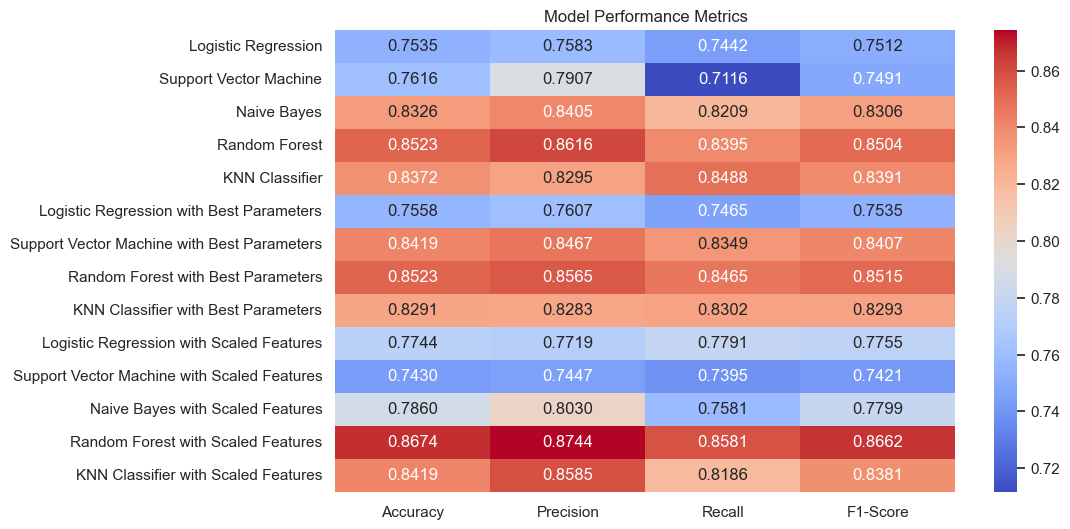

In [47]:
xticklabels = Performance_data.columns[1:]
yticklabels = Performance_data['Model']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.0)  # Adjust the font size if needed
sns.heatmap(Performance_data.iloc[:, 1:], annot=True, fmt='.4f', cmap='coolwarm',
            xticklabels=xticklabels, yticklabels=yticklabels)
plt.title('Model Performance Metrics')
plt.show()

## Conclusion:

The Random Forest model with scaled features consistently performs well across all metrics and has the highest accuracy, precision, recall, and F1-Score among all the models. This indicates that it's a strong candidate for a machine failure prediction problem.

Additionally, Random Forest models are known for their ability to handle complex data, capture non-linear relationships, and provide good generalization. They are also robust against overfitting and can handle both numerical and categorical features, making them suitable for various types of machine failure prediction tasks.

## What Next:

More complex models like Gradient Boosting and Neural Networks can be used improve the performance of the model.

Imbalanced Data Algorithms like SMOTE (Synthetic Minority Over-sampling Technique) can be used to see the performance of the model.

Clustering prediction can be done on the Failed machines data.